### Stock Price Prediction

In [2]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=10701a7063af77c325a0a5b99ab6f2d73c581d7007e9c6c0d83348a13eac8538
  Stored in directory: c:\users\y_tat\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp= yf.Ticker("SPOT")

In [3]:
sp_share = sp.history(period="max")

In [4]:
sp_share.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-03,165.899994,169.000000,148.259995,149.009995,30526500,0,0
2018-04-04,140.000000,148.929993,135.509995,144.220001,11702900,0,0
2018-04-05,149.229996,152.410004,141.250000,143.990005,7372800,0,0
2018-04-06,146.070007,148.729996,144.669998,147.919998,4228100,0,0
2018-04-09,149.500000,151.000000,148.589996,150.000000,2051400,0,0


In [5]:
sp_share.reset_index(inplace=True)

In [6]:
sp_share

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-04-03,165.899994,169.000000,148.259995,149.009995,30526500,0,0
1,2018-04-04,140.000000,148.929993,135.509995,144.220001,11702900,0,0
2,2018-04-05,149.229996,152.410004,141.250000,143.990005,7372800,0,0
3,2018-04-06,146.070007,148.729996,144.669998,147.919998,4228100,0,0
4,2018-04-09,149.500000,151.000000,148.589996,150.000000,2051400,0,0
...,...,...,...,...,...,...,...,...
908,2021-11-08,287.000000,289.859985,283.105011,286.899994,2077200,0,0
909,2021-11-09,282.239990,286.470001,276.105011,278.750000,1586200,0,0
910,2021-11-10,277.140015,279.709991,266.369995,269.720001,1367900,0,0
911,2021-11-11,275.100006,280.000000,273.750000,276.649994,1262800,0,0


#### Making a graph

<AxesSubplot:title={'center':"Spotify's stock price"}, xlabel='Date'>

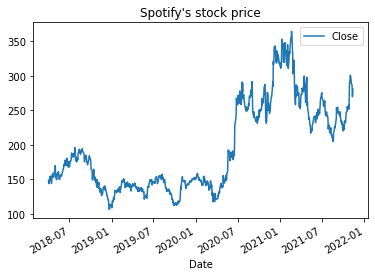

In [7]:
sp_share.plot(x="Date", y="Close", title="Spotify's stock price")

In [8]:
sp_share_monthly = sp_share.groupby(pd.Grouper(key='Date', freq='M'))['Close'].mean()
sp_share_monthly.head()

Date
2018-04-30    152.102001
2018-05-31    156.349092
2018-06-30    171.060476
2018-07-31    182.651906
2018-08-31    187.555218
Freq: M, Name: Close, dtype: float64

#### Predict stock price

In [9]:
days_for_calculation = 25
sp_share['Prediction']=sp_share[['Close']].shift(-days_for_calculation)
sp_share.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction
903,2021-11-01,295.399994,302.571014,294.519989,300.950012,2386000,0,0,NaN
904,2021-11-02,300.000000,305.600006,296.588013,298.200012,1315100,0,0,NaN
905,2021-11-03,297.799988,299.660004,291.029999,298.079987,1223700,0,0,NaN
906,2021-11-04,295.100006,299.079987,291.785004,293.480011,1137000,0,0,NaN
907,2021-11-05,293.299988,297.630005,285.000000,289.049988,1260700,0,0,NaN
908,2021-11-08,287.000000,289.859985,283.105011,286.899994,2077200,0,0,NaN
909,2021-11-09,282.239990,286.470001,276.105011,278.750000,1586200,0,0,NaN
910,2021-11-10,277.140015,279.709991,266.369995,269.720001,1367900,0,0,NaN
911,2021-11-11,275.100006,280.000000,273.750000,276.649994,1262800,0,0,NaN
912,2021-11-12,282.239990,284.529999,277.750000,280.559998,1853700,0,0,NaN


In [10]:
X=np.array(sp_share["Close"])[:-days_for_calculation]
X=X.reshape(-1,1)
print(X)

[[149.00999451]
 [144.22000122]
 [143.99000549]
 [147.91999817]
 [150.        ]
 [154.8999939 ]
 [149.57000732]
 [149.1000061 ]
 [149.        ]
 [144.32000732]
 [148.49000549]
 [154.91000366]
 [153.47000122]
 [158.44999695]
 [158.03999329]
 [155.07000732]
 [153.33000183]
 [156.6000061 ]
 [159.97999573]
 [161.66999817]
 [164.88000488]
 [170.        ]
 [160.38000488]
 [154.25999451]
 [150.        ]
 [150.63999939]
 [150.07000732]
 [158.13000488]
 [156.77000427]
 [159.97000122]
 [158.71000671]
 [161.38999939]
 [158.75999451]
 [150.80000305]
 [150.22000122]
 [150.42999268]
 [154.36999512]
 [154.58999634]
 [156.6000061 ]
 [154.61999512]
 [156.38000488]
 [157.71000671]
 [159.24000549]
 [162.83000183]
 [164.96000671]
 [165.63999939]
 [166.02999878]
 [171.47999573]
 [172.36999512]
 [170.22999573]
 [170.82000732]
 [178.1000061 ]
 [175.02000427]
 [174.3500061 ]
 [169.88999939]
 [176.3999939 ]
 [179.52999878]
 [180.94000244]
 [170.36999512]
 [175.97999573]
 [172.1499939 ]
 [167.69999695]
 [168.24

#### Linear Regression

In [11]:
y= np.array(sp_share["Prediction"])[:-days_for_calculation]
y=y.reshape(-1,1)
print(y)

[[150.63999939]
 [150.07000732]
 [158.13000488]
 [156.77000427]
 [159.97000122]
 [158.71000671]
 [161.38999939]
 [158.75999451]
 [150.80000305]
 [150.22000122]
 [150.42999268]
 [154.36999512]
 [154.58999634]
 [156.6000061 ]
 [154.61999512]
 [156.38000488]
 [157.71000671]
 [159.24000549]
 [162.83000183]
 [164.96000671]
 [165.63999939]
 [166.02999878]
 [171.47999573]
 [172.36999512]
 [170.22999573]
 [170.82000732]
 [178.1000061 ]
 [175.02000427]
 [174.3500061 ]
 [169.88999939]
 [176.3999939 ]
 [179.52999878]
 [180.94000244]
 [170.36999512]
 [175.97999573]
 [172.1499939 ]
 [167.69999695]
 [168.24000549]
 [170.69000244]
 [168.66000366]
 [176.44000244]
 [175.69999695]
 [177.44000244]
 [180.42999268]
 [182.3500061 ]
 [188.3500061 ]
 [187.21000671]
 [184.22000122]
 [187.05000305]
 [186.1499939 ]
 [182.19000244]
 [182.78999329]
 [188.05000305]
 [187.80999756]
 [187.99000549]
 [196.27999878]
 [186.27000427]
 [176.78999329]
 [182.83000183]
 [180.11999512]
 [179.71000671]
 [175.5       ]
 [179.94

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)

In [13]:
LrModel=LinearRegression().fit(x_train, y_train)

In [23]:
y_pred=LrModel.predict(x_test)
lr_rmse=math.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse
lr_r2=r2_score(y_test,y_pred)
print("RMSE:",lr_rmse,"R2socre:",lr_r2)

RMSE: 29.90122721754072 R2socre: 0.7881903181126733


####  Decision Tree Regression

In [24]:
TreeModel=DecisionTreeRegressor().fit(x_train, y_train)

In [25]:
x_forecast=np.array(sp_share["Close"])[-days_for_calculation:]
x_forecast=x_forecast.reshape(-1,1)

In [26]:
lrPredict=LrModel.predict(x_forecast)
print(lrPredict)

[[230.96359458]
 [234.0049171 ]
 [241.61267356]
 [244.76993155]
 [244.79668694]
 [246.06317203]
 [252.11904808]
 [248.16800162]
 [251.57499922]
 [249.75556495]
 [254.15255265]
 [249.07772556]
 [267.74483293]
 [281.85442028]
 [282.25575106]
 [292.55701003]
 [290.10433321]
 [289.99728445]
 [285.89464682]
 [281.94358675]
 [280.02604487]
 [272.7572081 ]
 [264.70351041]
 [270.88424945]
 [274.37151321]]


In [27]:
TreePredict=TreeModel.predict(x_forecast)

In [28]:
sp_future_share= sp_share[-days_for_calculation:]
lrPredict_flat=np.ndarray.flatten(lrPredict)
#lrPrediction=pd.Series(lrPredict_flat)
sp_future_share.loc[:,"LrPrediction"]=lrPredict_flat
sp_future_share.tail(3)

C:\Users\y_tat\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\y_tat\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction,LrPrediction
910,2021-11-10,277.140015,279.709991,266.369995,269.720001,1367900,0,0,NaN,264.703510
911,2021-11-11,275.100006,280.000000,273.750000,276.649994,1262800,0,0,NaN,270.884249
912,2021-11-12,282.239990,284.529999,277.750000,280.559998,1853700,0,0,NaN,274.371513


In [29]:
TreePredict_flat=np.ndarray.flatten(TreePredict)
#sp_share["Tree_Forecast"]= pd.Series(TreePredict_flat)
#sp_share["Tree_Forecast"]=sp_share["Tree_Forecast"].shift(days_for_calculation)
sp_future_share.loc[:,"TreePrediction"]=TreePredict_flat
sp_future_share.tail(3)

C:\Users\y_tat\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\y_tat\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction,LrPrediction,TreePrediction
910,2021-11-10,277.140015,279.709991,266.369995,269.720001,1367900,0,0,NaN,264.703510,311.000000
911,2021-11-11,275.100006,280.000000,273.750000,276.649994,1262800,0,0,NaN,270.884249,268.690002
912,2021-11-12,282.239990,284.529999,277.750000,280.559998,1853700,0,0,NaN,274.371513,234.059998


#### Make a graph with prediction 

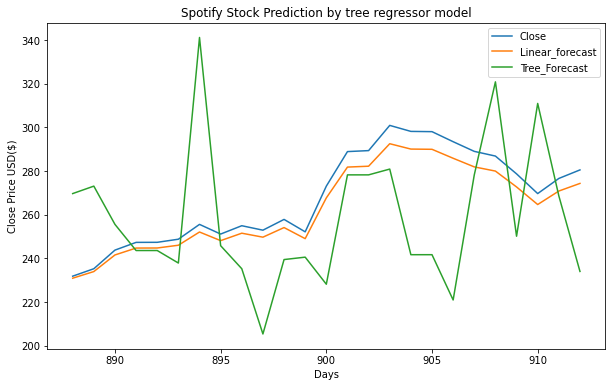

In [30]:
plt.figure(figsize=(10,6))
plt.title("Spotify Stock Prediction by tree regressor model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
#plt.plot(sp_share["Close"])
plt.plot(sp_future_share[["Close","LrPrediction","TreePrediction"]] )
plt.legend(["Close", "Linear_forecast","Tree_Forecast"])
plt.show()

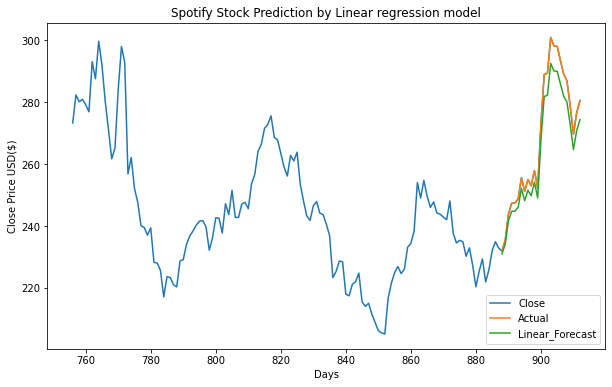

In [33]:
sp_share_plot = sp_share[sp_share.Date>"2021-04-01"]
plt.figure(figsize=(10,6))
plt.title("Spotify Stock Prediction by Linear regression model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(sp_share_plot[["Close"]])
plt.plot(sp_future_share[["Close","LrPrediction"]])
plt.legend(["Close","Actual","Linear_Forecast"])
plt.show()

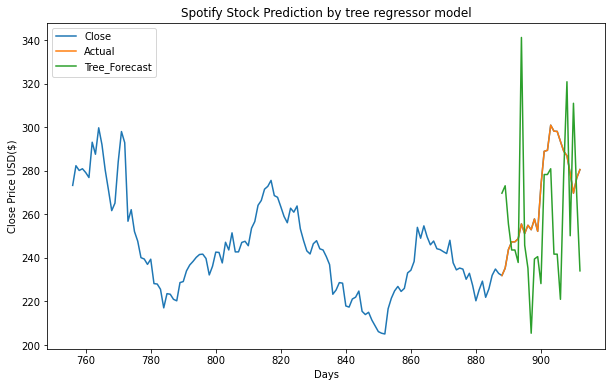

In [34]:
plt.figure(figsize=(10,6))
plt.title("Spotify Stock Prediction by tree regressor model")
plt.xlabel("Days")
plt.ylabel("Close Price USD($)")
plt.plot(sp_share_plot[["Close"]])
plt.plot(sp_future_share[["Close","TreePrediction"]])
plt.legend(["Close","Actual","Tree_Forecast"])
plt.show()

#### Reference 

https://thecleverprogrammer.com/2020/05/11/stock-price-prediction-with-machine-learning/
https://thecleverprogrammer.com/2020/11/14/stock-price-prediction-using-machine-learning/

https://www.youtube.com/watch?v=QIUxPv5PJOY

https://towardsai.net/p/machine-learning/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b